In [1]:
from csv import DictReader

with open('_data/properties_master.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows = [r for r in reader]
csv_file.close()

In [2]:
##################
### CN AND YSI ###
##################

properties_to_use = [
    'properties.cetane_number.value',
    'properties.ysi_unified.value'
]

samples = []
for row in rows:
    use = True
    for prop in properties_to_use:
        if row[prop] == '-':
            use = False
            break
    if use:
        samples.append(row)

print(len(samples))

150


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

data_cn = np.array([float(s['properties.cetane_number.value']) for s in samples]).reshape(-1, 1)
data_ysi = np.array([float(s['properties.ysi_unified.value']) for s in samples]).reshape(-1, 1)

scaler_cn = StandardScaler()
scaler_ysi = StandardScaler()
scaler_cn.fit(data_cn)
scaler_ysi.fit(data_ysi)
data_cn = scaler_cn.transform(data_cn)
data_ysi = scaler_ysi.transform(data_ysi)

print(min(data_cn), max(data_cn))
print(min(data_ysi), max(data_ysi))

[-1.44864188] [4.93702699]
[-0.72020123] [4.53632401]


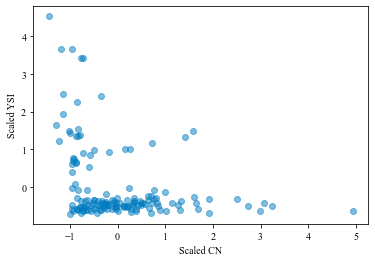

In [4]:
from matplotlib import pyplot as plt

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Scaled CN')
plt.ylabel('Scaled YSI')
plt.scatter(data_cn, data_ysi, alpha=0.5, color=(0, 114/235, 178/235))
plt.show()

In [5]:
from hoeffdingd import hoeffdingd

print(hoeffdingd([d[0] for d in data_cn], [d[0] for d in data_ysi]))

0.02395914574877557


In [6]:
##################
### CN AND LHV ###
##################

from ecnet.datasets import load_cn, load_lhv

smiles_cn, cn = load_cn()
smiles_lhv, lhv = load_lhv()

data_cn = []
data_lhv = []

for idx_cn, smi_cn in enumerate(smiles_cn):
    for idx, smi in enumerate(smiles_lhv):
        if smi_cn == smi:
            data_cn.append(cn[idx_cn])
            data_lhv.append(lhv[idx])
            break

print(len(data_cn), len(data_lhv))

77 77


In [7]:
scaler_cn = StandardScaler()
scaler_lhv = StandardScaler()
scaler_cn.fit(data_cn)
scaler_lhv.fit(data_lhv)
data_cn = scaler_cn.transform(data_cn)
data_lhv = scaler_lhv.transform(data_lhv)

print(min(data_cn), max(data_cn))
print(min(data_lhv), max(data_lhv))

[-1.14043184] [3.18646595]
[-2.64439138] [1.26098293]


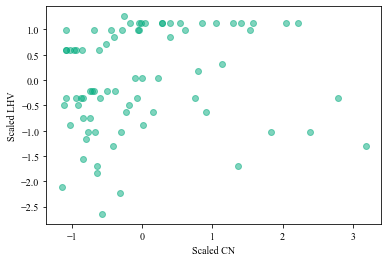

In [8]:
plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Scaled CN')
plt.ylabel('Scaled LHV')
plt.scatter(data_cn, data_lhv, alpha=0.5, color=(0, 158/235, 115/235))
plt.show()

In [9]:
print(hoeffdingd([d[0] for d in data_cn], [d[0] for d in data_lhv]))

0.04211413148417474


In [10]:
###################
### YSI AND LHV ###
###################

from ecnet.datasets import load_ysi

smiles_ysi, ysi = load_ysi()
smiles_lhv, lhv = load_lhv()

data_ysi = []
data_lhv = []

for idx_ysi, smi_ysi in enumerate(smiles_ysi):
    for idx, smi in enumerate(smiles_lhv):
        if smi_ysi == smi:
            data_ysi.append(ysi[idx_ysi])
            data_lhv.append(lhv[idx])
            break

print(len(data_ysi), len(data_lhv))

139 139


In [11]:
scaler_ysi = StandardScaler()
scaler_lhv = StandardScaler()
scaler_ysi.fit(data_ysi)
scaler_lhv.fit(data_lhv)
data_ysi = scaler_ysi.transform(data_ysi)
data_lhv = scaler_lhv.transform(data_lhv)

print(min(data_ysi), max(data_ysi))
print(min(data_lhv), max(data_lhv))

[-0.65429383] [5.2530424]
[-2.3695902] [1.30371506]


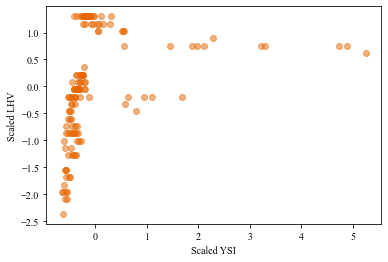

In [12]:
plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Scaled YSI')
plt.ylabel('Scaled LHV')
plt.scatter(data_ysi, data_lhv, alpha=0.5, color=(213/235, 94/235, 0))
plt.show()

In [13]:
print(hoeffdingd([d[0] for d in data_ysi], [d[0] for d in data_lhv]))

0.2639773109888391
